In [2]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('earthquake_data_tsunami.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (782, 13)


In [3]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB
None


In [5]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939    1.462724   322.465367  250.188177   
min      6.500000    0.000000    1.000000   650.000000    0.000000   
25%      6.600000    0.000000    5.000000   691.000000    0.000000   
50%      6.800000    5.000000    6.000000   754.000000  140.000000   
75%      7.100000    7.000000    7.000000   909.750000  445.000000   
max      9.100000    9.000000    9.000000  2910.000000  934.000000   

             dmin         gap       depth    latitude   longitude  \
count  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     1.325757   25.038990   75.883199    3.538100   52.609199   
std      2.218805   24.225067  137.277078   27.303429  117.898886   
min      0.000000    0.000000    2.700000  -61.848400 -179.968000   
25%  

Target Variable (tsunami) Distribution:
tsunami
0    478
1    304
Name: count, dtype: int64

Tsunami occurrence rate: 38.87%

Correlation with tsunami target:
tsunami      1.000000
Year         0.647211
dmin         0.400752
cdi          0.160266
gap          0.116360
depth        0.056814
magnitude   -0.004726
sig         -0.015500
Month       -0.022028
latitude    -0.113209
longitude   -0.136778
mmi         -0.147363
nst         -0.600231
Name: tsunami, dtype: float64


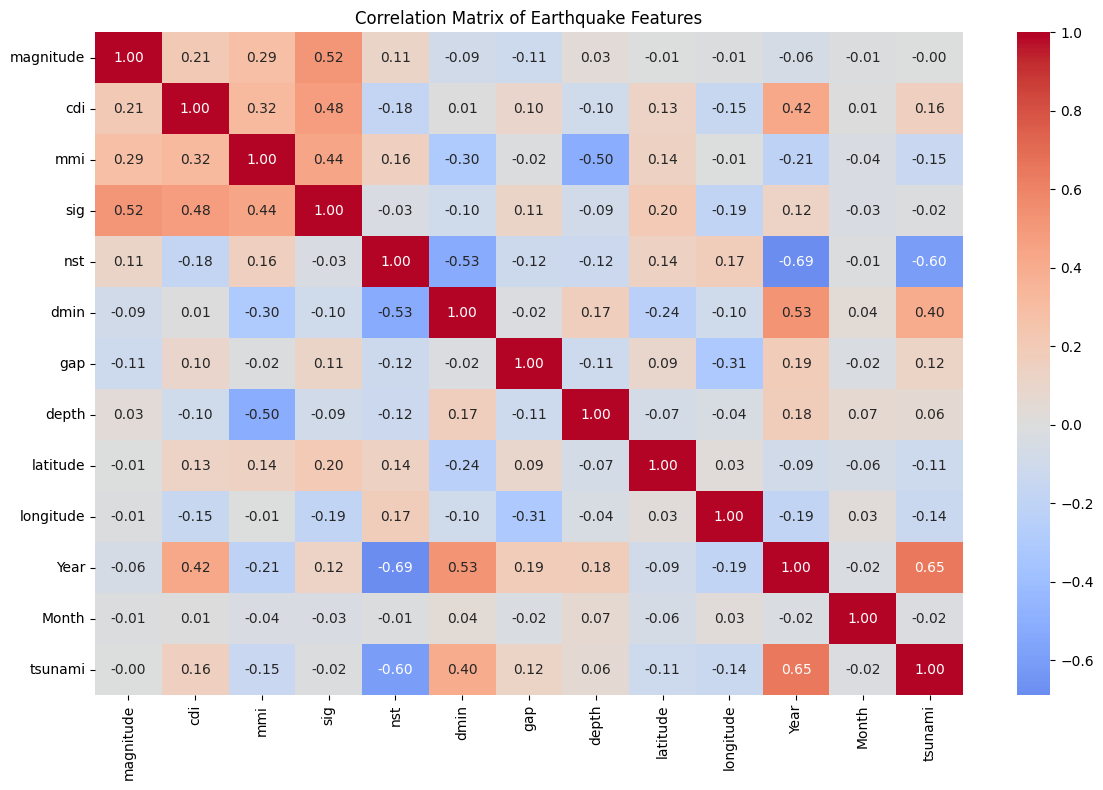

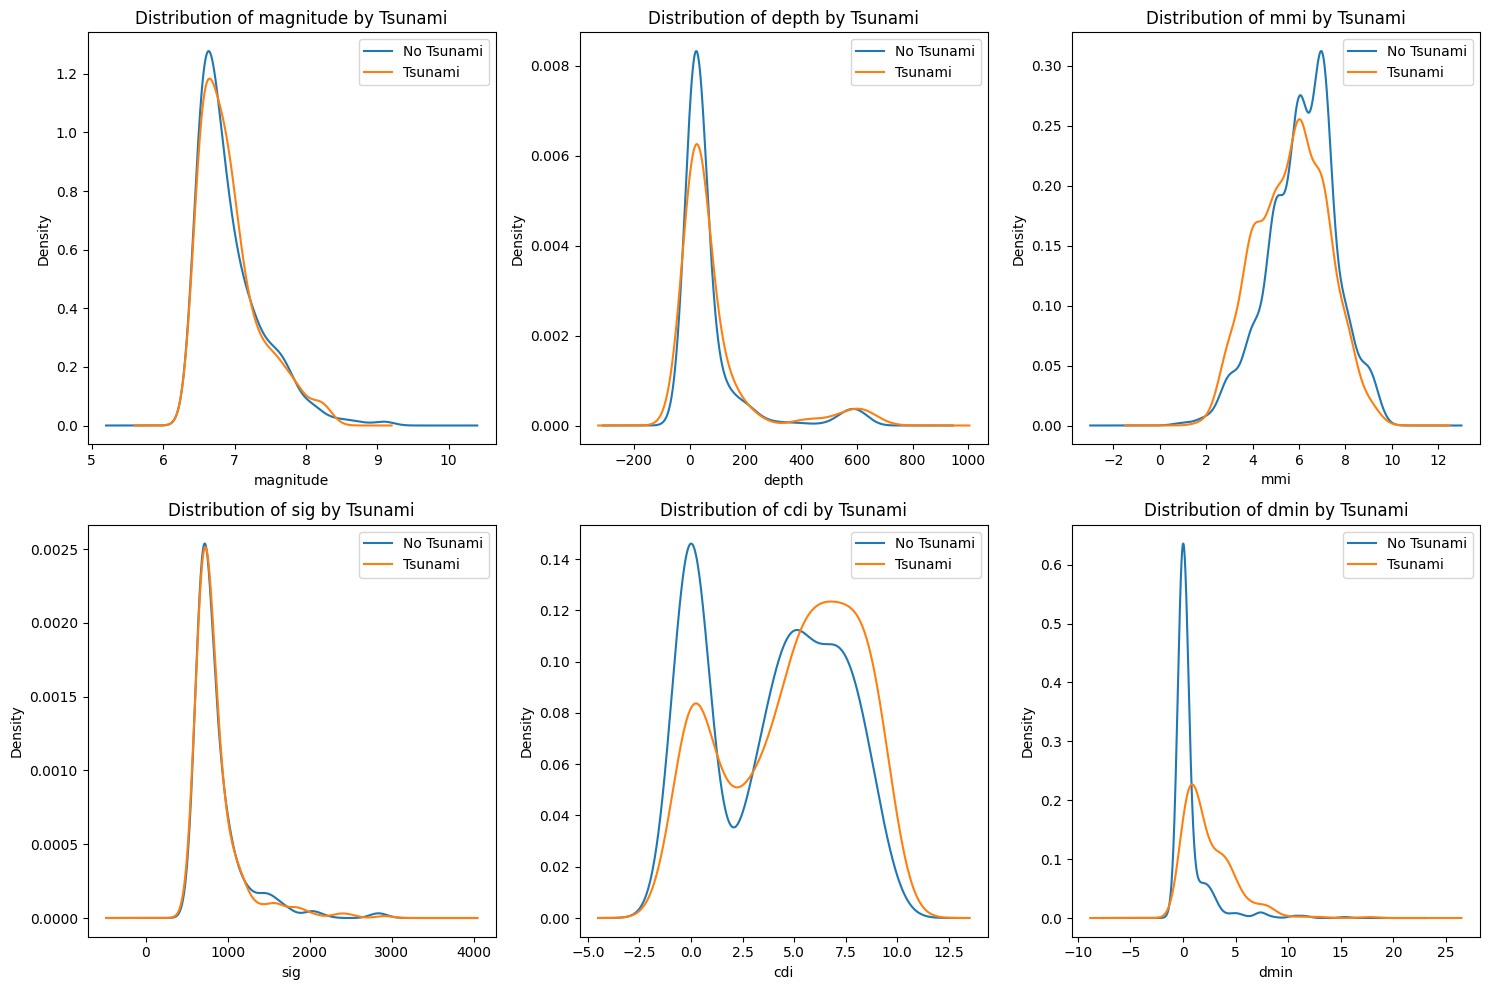

In [7]:
# Step 2: Analyze target variable distribution and correlations
print("Target Variable (tsunami) Distribution:")
print(df['tsunami'].value_counts())
print(f"\nTsunami occurrence rate: {df['tsunami'].mean():.2%}")

# Check correlation with target variable
correlation_with_target = df.corr()['tsunami'].sort_values(ascending=False)
print("\nCorrelation with tsunami target:")
print(correlation_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Earthquake Features')
plt.tight_layout()
plt.show()

# Distribution of key features by tsunami occurrence
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
key_features = ['magnitude', 'depth', 'mmi', 'sig', 'cdi', 'dmin']

for i, feature in enumerate(key_features):
    row, col = i // 3, i % 3
    df.groupby('tsunami')[feature].plot(kind='kde', ax=axes[row, col], legend=True)
    axes[row, col].set_title(f'Distribution of {feature} by Tsunami')
    axes[row, col].set_xlabel(feature)
    axes[row, col].legend(['No Tsunami', 'Tsunami'])

plt.tight_layout()
plt.show()

Geographic Analysis:
Earthquake locations span: Latitude (-61.85 to 71.63)
Longitude (-179.97 to 179.66)
magnitude: 37 outliers (outside [5.85, 7.85])
depth: 139 outliers (outside [-39.62, 103.38])
sig: 73 outliers (outside [362.88, 1237.88])
dmin: 61 outliers (outside [-2.79, 4.66])


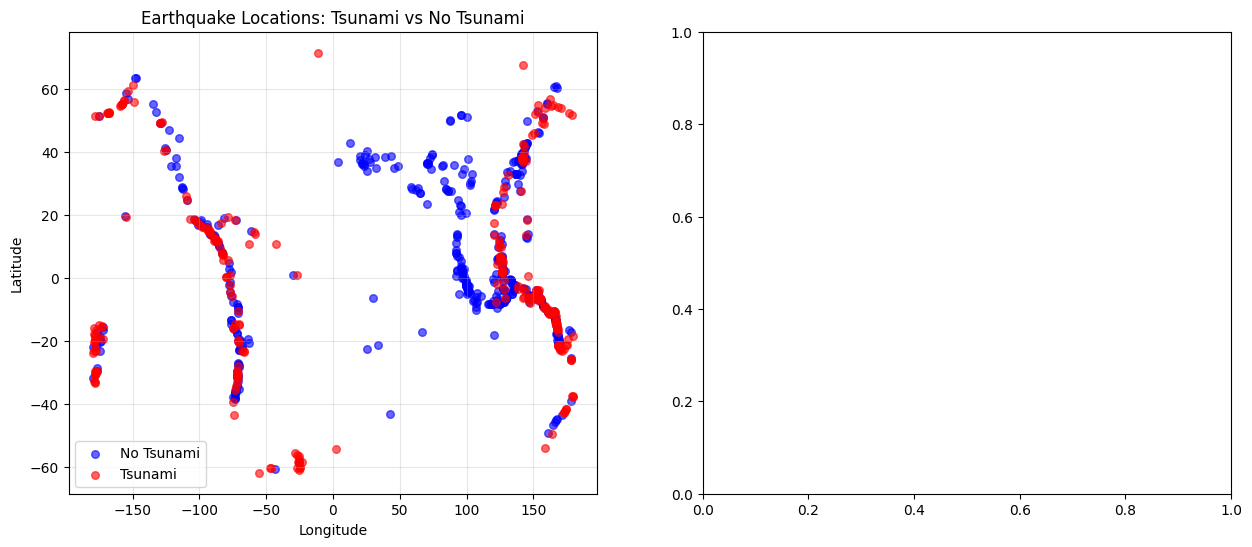

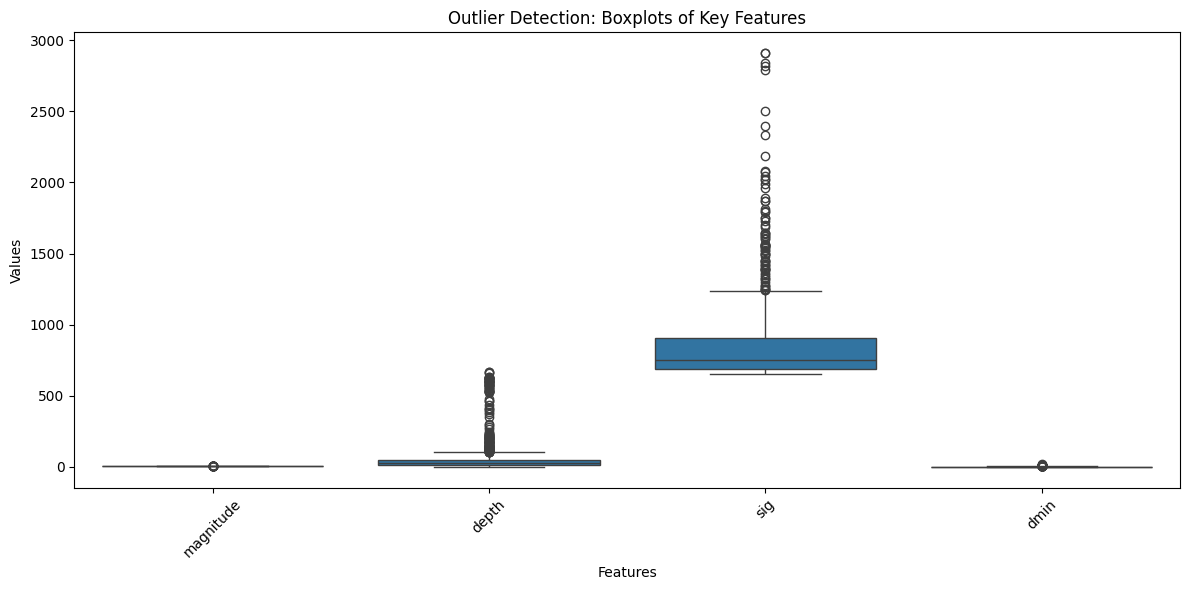


Outlier Summary:
magnitude: 37 outliers (4.7%)
depth: 139 outliers (17.8%)
sig: 73 outliers (9.3%)
dmin: 61 outliers (7.8%)


In [8]:
# Step 3: Geographic analysis and outlier detection
print("Geographic Analysis:")
print(f"Earthquake locations span: Latitude ({df['latitude'].min():.2f} to {df['latitude'].max():.2f})")
print(f"Longitude ({df['longitude'].min():.2f} to {df['longitude'].max():.2f})")

# Plot earthquake locations colored by tsunami occurrence
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
tsunami_events = df[df['tsunami'] == 1]
non_tsunami_events = df[df['tsunami'] == 0]

plt.scatter(non_tsunami_events['longitude'], non_tsunami_events['latitude'],
           alpha=0.6, c='blue', label='No Tsunami', s=30)
plt.scatter(tsunami_events['longitude'], tsunami_events['latitude'],
           alpha=0.6, c='red', label='Tsunami', s=30)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations: Tsunami vs No Tsunami')
plt.legend()
plt.grid(True, alpha=0.3)

# Outlier detection using IQR method
plt.subplot(1, 2, 2)
features_to_check = ['magnitude', 'depth', 'sig', 'dmin']
outlier_summary = {}

for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers (outside [{lower_bound:.2f}, {upper_bound:.2f}])")

# Plot boxplots for key features
df_melted = df[features_to_check].melt(var_name='Features', value_name='Values')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Features', y='Values', data=df_melted)
plt.title('Outlier Detection: Boxplots of Key Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nOutlier Summary:")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count} outliers ({count/len(df)*100:.1f}%)")